**Problem Statement:**
\
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# **Step 1: Data Acquisition and Preliminary Exploration Purpose:**

**Acquisition:** Load the dataset into a Python environment.

**Preliminary Exploration:** Understand the basic structure of the data, including the types of variables, ranges of values, and potential correlations.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
# Load the dataset
df = pd.read_csv('day.csv')

In [27]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

This dataset contains information about daily bike rentals from a bike-sharing service. It includes 16 columns, each representing different attributes.
The column **'instant'** seems to be a unique identifier for each record.

**'dteday'** indicates the date of the rental, formatted as day-month-year.

The **'season'** column categorizes the day into one of four seasons, while 'yr' and 'mnth' denote the year and month, respectively.

The dataset includes **'holiday'** and **'weekday'** columns, suggesting whether the day was a holiday and the day of the week. **'Workingday'** signifies whether the day was a working day or not. **'Weathersit'** likely represents the weather situation, possibly categorized into different types.

Key environmental factors such as **'temp'** (temperature), **'atemp'** (feeling temperature), **'hum'** (humidity), and **'windspeed'** are included, providing insights into how weather conditions affect bike rentals.

The final columns, **'casual'**, **'registered'**, and **'cnt'**, represent the count of casual users, registered users, and the total count of bike rentals for the day, respectively. This breakdown allows for an analysis of usage patterns among different user types. The first five records show varying counts of rentals, indicating daily fluctuations in bike-sharing demand. Overall, this dataset offers a comprehensive view of factors affecting bike rental demand, making it suitable for analyzing and predicting patterns in bike-sharing usage.

In [37]:
# Define the feature categories
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']  # List of numeric feature names
categorical_features = ['season', 'mnth', 'weekday', 'weathersit']  # List of categorical feature names']

# Set up the column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # This will pass through numeric features without transformation
)

# **Step 2: Exploratory Data Analysis**

In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          instant          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    0.500000    6.526027    0.028767    2.997260    0.683562   
std    210.877136    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%    183.250000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%    365.500000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%    547.750000    1.000000   10.000000    0.000000    5.000000    1.000000   
max    730.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

             temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
std      7.506729    8.150308   14.2375

The dataset's summary statistics offer important context for the bike-sharing data.

1. **Data Range and Count**: The 'instant' variable indicates that the dataset covers 730 days (two years) of bike rental data. This time span probably encompasses a variety of seasons and climates.

2. **Temporal and Seasonal Variables**:

- **Season**: Presumably, the four seasons are represented by the values of the'season' variable, which spans from 1 to 4. Its mean of 2.5 indicates a seasonally uniform distribution.

- **Year ('yr')**: The data is evenly distributed between the two years, as indicated by the mean value of 0.5 for 'yr'.

- **Month ('mnth'):** The'mnth' column indicates a uniform distribution throughout the year, spanning all 12 months with a mean of roughly 6.5.

3. **Working and Holiday Days**:

  The dataset's majority of days are not considered holidays, as indicated by the low mean (0.0287) and maximum value of 1 for the 'holiday' variable.

- **Weekday and Workingday**: The entire week is covered by the columns labeled "weekday" and "workingday." According to the 'workingday' mean of 0.6836, 68% of the days are thought to be working days.

4. **Climatic Situation**:

- **Weather Situation ('weathersit')**: This indicates that, on a scale of 1 to 3, the mean is near 1.4, indicating generally pleasant weather conditions.
- **Temperature ('temp' and 'atemp')**: Throughout the data period, there was a significant range in both the actual and felt temperatures, showing a variety of meteorological conditions.
- **Humidity ('hum')**: There is a broad range in the average humidity of 62.76%, which suggests a range of meteorological conditions.
- **Windspeed**: With a mean of 12.76 km/h, the windspeed fluctuates considerably as well.

5. **Rental Bicycle Counts**:

- **Casual and Registered Users**: The mean values of casual users (849.25) and registered users (3658.76) differ significantly, suggesting that registered users are more prevalent among bike rentals.
- **Total Count ('cnt')**: With a mean of 4508, the total number of daily bike rentals ranges from 22 to 8714. This large range indicates a high degree of fluctuation in daily rental counts, which may be attributed to a number of variables, including the season, the weather, and whether the day is a holiday or a working day.

These figures point to a comprehensive dataset that includes a range of variables, such as user type, weather, and temporal aspects, that may affect the demand for bike rentals. This dataset can be used to forecast demand and analyze trends in the use of bike sharing.

In [6]:
# Information about data types and null values
print("\nData Information:")
print(df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int64  
 16  month       730 non-null    int64  
 17  year        730 non-null    int64  
dtypes: float64(4), int64(12), object(2)
memory usage: 1

Several important features of the bike-sharing dataset are shown by the data information summary:

1. **Completeness and Size of Data**: - There are 730 records in the dataset, which represents two years' worth of daily bike rental data. Crucially, every column shows a complete dataset devoid of imputation due to the absence of missing values.

2. **Types of Data**: **Integer Variables**: The majority of the columns—'instant','season', 'yr' (year),'mnth' (month), 'holiday', 'weekday', 'workingday', 'weathersit', 'casual','registered', and 'cnt'—are of integer data type (int64). These variables stand for identifier, count, and category data. - **Surface Adjustments**: Four columns, namely 'temp' (temperature), 'atemp' (feeling temperature), 'hum' (humidity), and 'windspeed', contain floating-point numbers (float64). These show continuous numerical statistics that are probably connected to the surroundings. - **Item Change**: The 'dteday' column is an object type, and it most likely contains date data in a text format.

3. **Usage of Memory**: - The dataset uses about 91.4 KB of RAM, which is a very economical amount of memory for computing.

4. **Possible Modifications to the Data:** Because it's an object type, the 'dteday' column might need to be converted into a datetime format for any time series analysis or if modeling requires the date information. - Even though they are numerical, the integer-based columns'season', 'yr','mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' probably reflect categorical data and may need to be handled as such in some models, particularly if they are nominal rather than ordinal.

5. **Target and Identification Variables**: The 'instant' column might not be predictive; rather, it seems to be an identifier. - The goal variable is the 'cnt' column, which is the overall count of bike rentals (the sum of the 'casual' and'registered' rentals).

The dataset, which combines date, numerical, and category variables, is generally well-structured and offers a thorough foundation for investigating the variables influencing the demand for bike rentals. This dataset is perfect for statistical analysis and predictive modeling since it has complete records for a two-year period and no null values.

In [7]:
#Checking for null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  day         730 non-null    int64  
 16  month       730 non-null    int64  
 17  year        730 non-null    int64  
dtypes: float64(4), int64(12), object(2)
memory usage: 102.8+ KB


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
month         0
year          0
dtype: int64

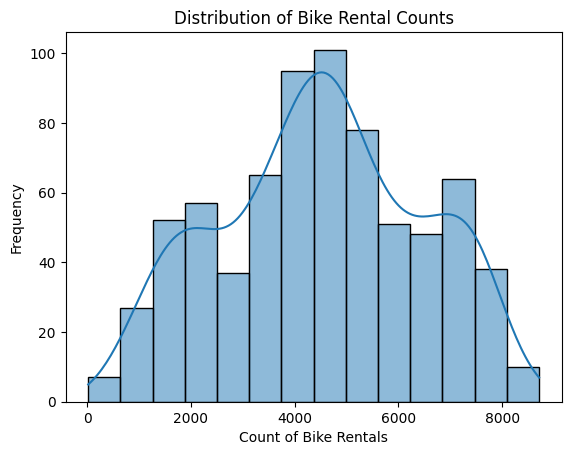

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of the target variable 'cnt'
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

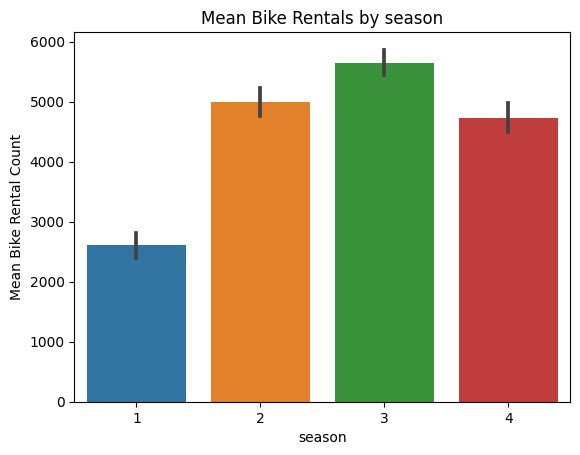

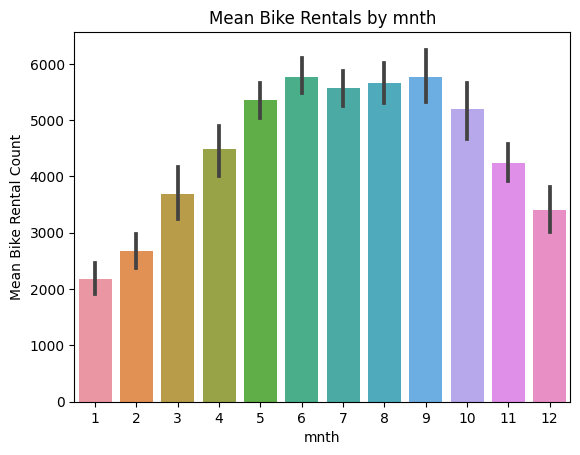

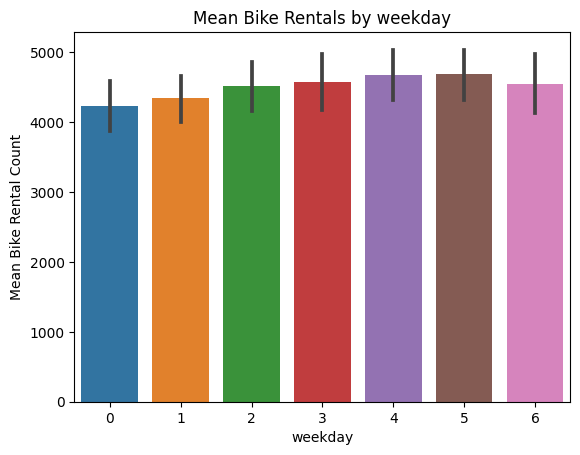

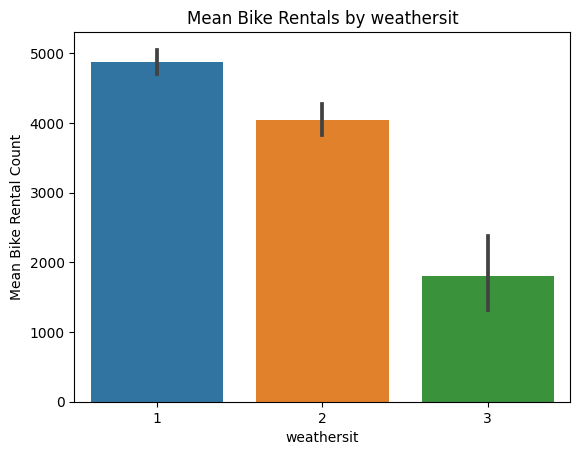

In [33]:
# For categorical features, plot the mean bike rentals for each category
for feature in categorical_features:
    sns.barplot(x=feature, y='cnt', data=df)
    plt.title(f'Mean Bike Rentals by {feature}')
    plt.ylabel('Mean Bike Rental Count')
    plt.show()

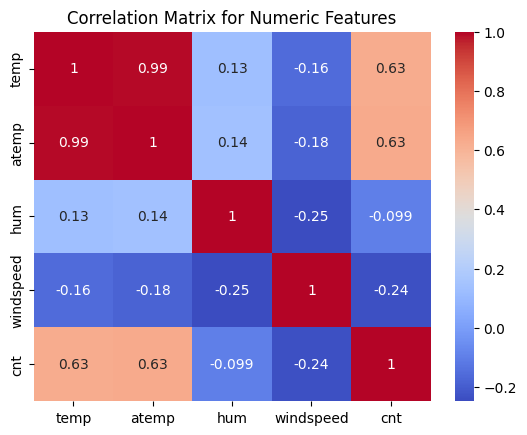

In [39]:
# Plot the correlations between numerical features and the target variable
correlation_matrix = df[numeric_features + ['cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

Here's an analysis based on the heatmap:

**Temperature and Rentals:** With a correlation coefficient of roughly 0.63, the temperature ('temp') and the number of bike rentals ('cnt') are strongly positively correlated. This implies that the number of bike rentals tends to grow along with the temperature. The variable 'atemp', which denotes the "feels like" temperature, shows a similar link, suggesting that rental behavior is also significantly influenced by the perceived temperature.

**High Correlation between "temp" and "atemp":** "temp" and "atemp" have a very high correlation (about 0.99), meaning that the information they provide is nearly similar. This multicollinearity may misrepresent the relative importance of various features in a regression model, which is why one of these variables would usually be removed to prevent duplication.

**Humidity and Bike Rentals:** There is a marginally negative (about -0.099) association between humidity (or "hum") and bike rentals, indicating that increased humidity levels may be associated with a modest decline in bike rentals. This relationship isn't very strong, though.

**Windspeed and Rentals:** There is a negative association (around -0.24) between windspeed ('windspeed') and bike rentals, suggesting that the former tend to decline on days with higher wind speeds. This may be due to the fact that riding in heavy winds is more difficult or uncomfortable.

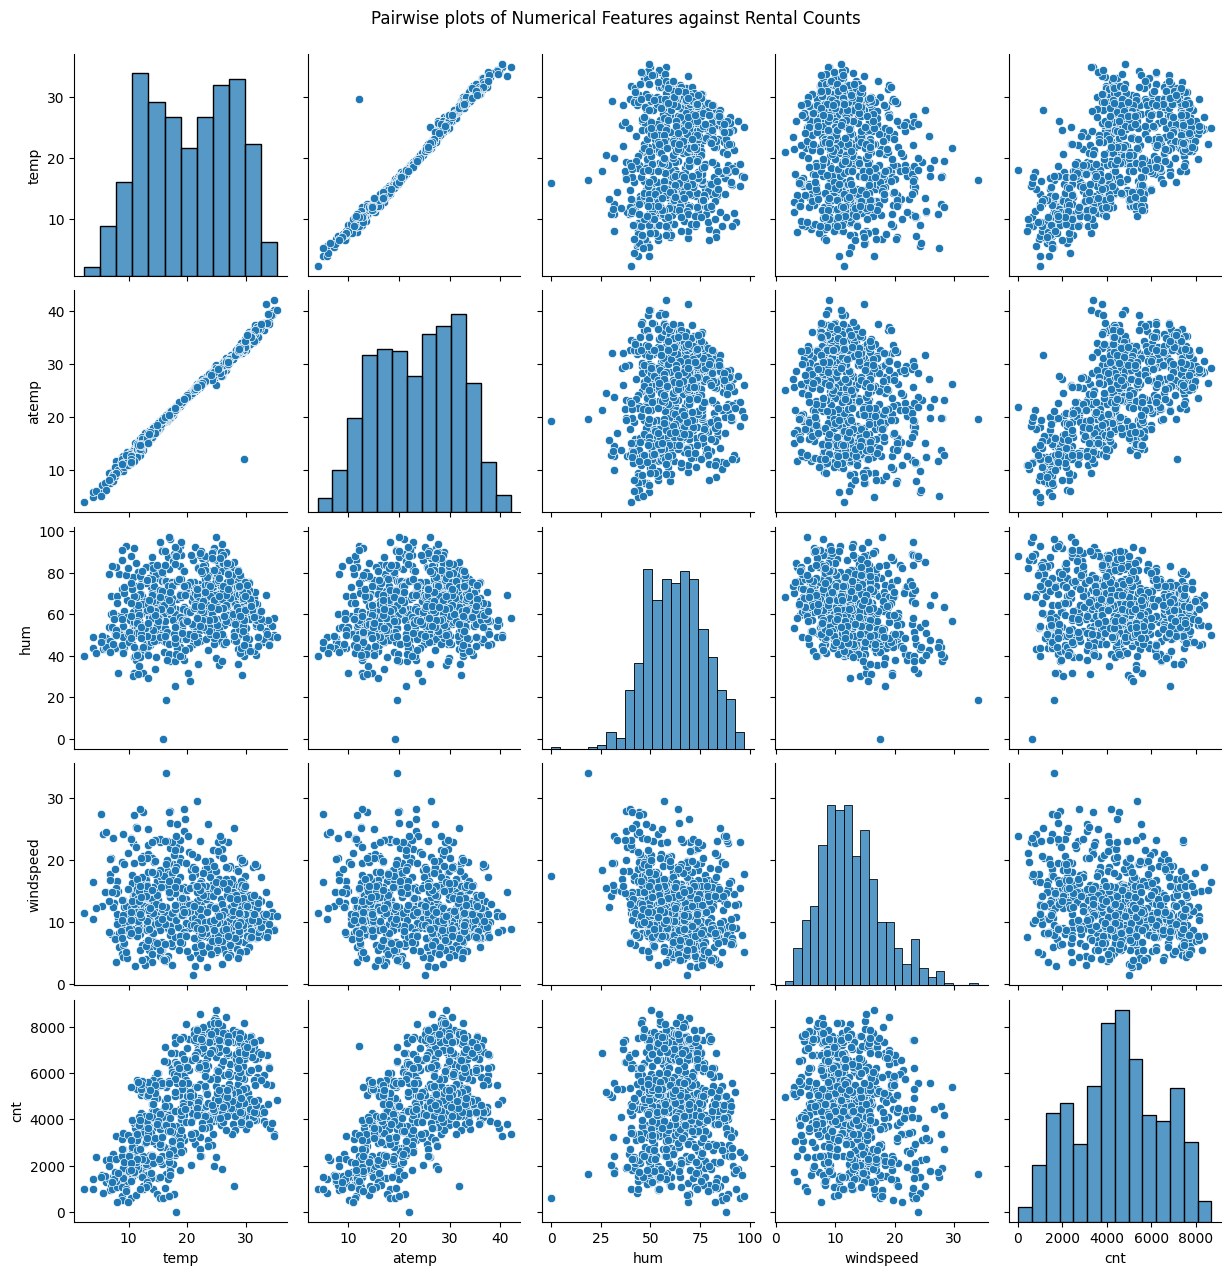

In [41]:
# Visualize pairwise relationships between numerical features and the target variable
sns.pairplot(df, vars=numeric_features + ['cnt'])
plt.suptitle('Pairwise plots of Numerical Features against Rental Counts', y=1.02)
plt.show()


**Distributions and Relationships**

**a.** Temperature ('temp') and 'atemp' (feeling temperature):

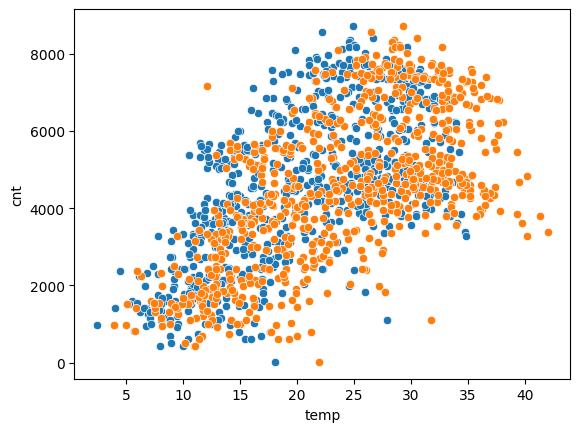

In [9]:
sns.scatterplot(data=df, x='temp', y='cnt')
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.show()

**b.** Relationship between humidity and bike rentals

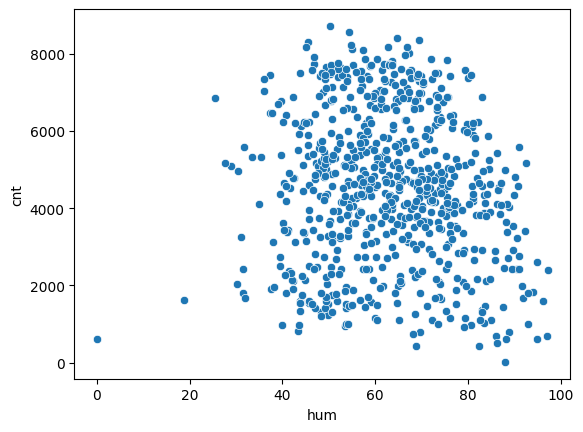

In [10]:
sns.scatterplot(data=df, x='hum', y='cnt')
plt.show()

c. Analyzing if 'winspeed' affects bike rentals

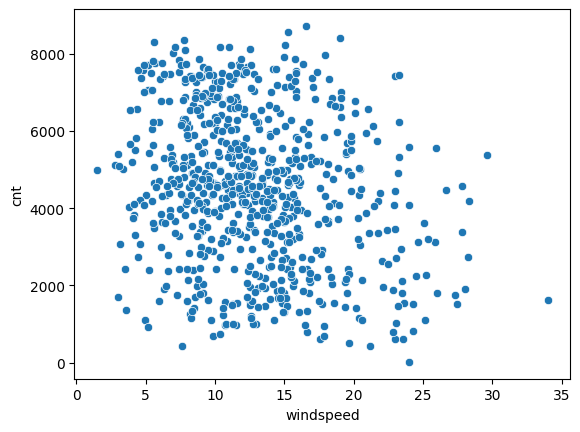

In [11]:
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.show()

# Step3: Data Preprocessing

Creating dummy variables for categorical features

In [43]:
# Drop columns that are not features and the target variable 'cnt'
X = df.drop(['dteday', 'instant', 'casual', 'registered', 'cnt'], axis=1)
y = df['cnt']  # This is the target variable


In [44]:
# Apply the preprocessing transformation defined earlier to the features
X_processed = preprocessor.fit_transform(X)

In [45]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [46]:
# Create an instance of the LinearRegression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# Use the trained model to make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance using R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the performance metrics
print(f'R-squared Score: {r2}')
print(f'Mean Squared Error: {mse}')


R-squared Score: 0.8370077818815339
Mean Squared Error: 604792.4851598174


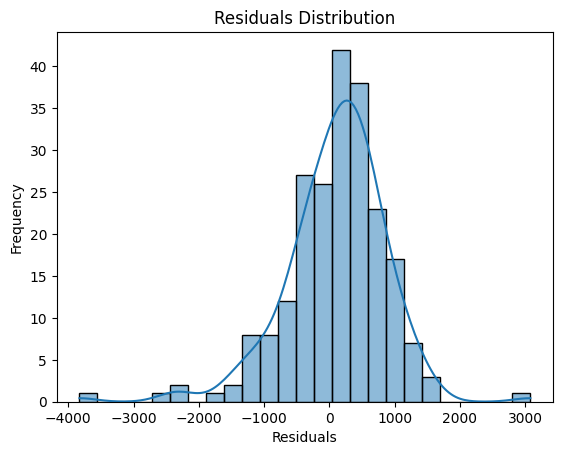

In [48]:
# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

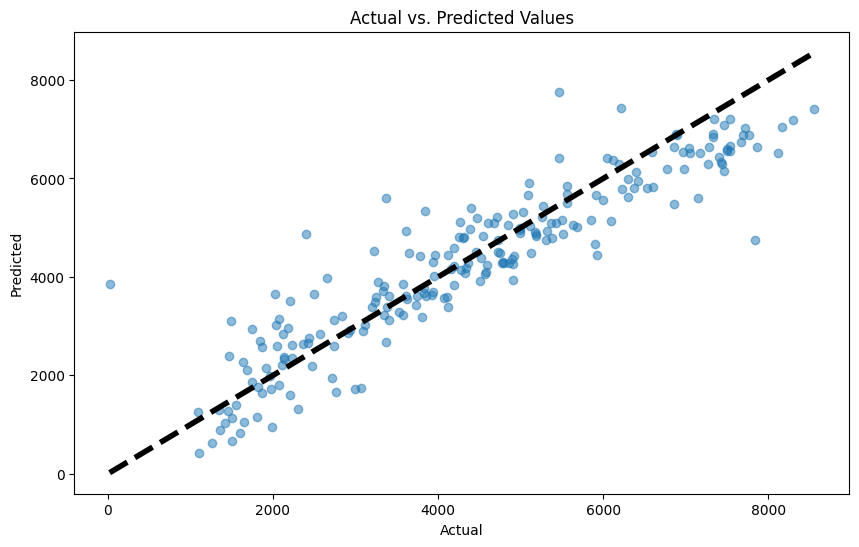

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

This plot shows the relation ship between the actual bike rental counts(y_test) and the predicted counts(y_pred) from the linear regression model.

All the point that are on the fit line represents the accurate predictions and the point that are away from the line are error predictions.

From the plot, we can say that there is a strong positive correlation stating that the model performs well.

# **Conclusion:**

This Linear Regression model shows a robust prediction with an R-squared score of 0.837 which means 83.7 of the variance in the rental data. It is a strong fit that suggests the select features effectively capture the underlying patterns infulencing bike rental behaviour.

The actual vs. anticipated values graphic illustrates this, but the Mean Squared Error (MSE) of about 604,786 indicates that there is still a significant amount of volatility that the model is not capturing. This is especially evident in the prediction of higher rental counts. In situations where there is more demand, the model tends to underestimate.

**Model Usage and Business Implications:** The model can be employed to anticipate daily demand for bike rentals, allowing for strategic business planning in several key areas:

- **Inventory management:** The model's output can direct the distribution and allocation of bikes among different stations in order to satisfy the expected demand and guarantee the best possible fleet utilization.

- **Pricing Strategy:** To maximize revenue, use dynamic pricing strategies depending on anticipated demand levels. For example, give promotions during times of low demand and optimize rates during times of strong demand.

- **Maintenance Scheduling:** To minimize the impact on rental availability, schedule bike maintenance during times of lower projected demand.

- **Promotional Campaigns:** Plan your marketing campaigns strategically to align with anticipated spikes in demand; you may want to concentrate on particular seasons or good weather as the model suggests.

- **Planning for Expansion:** Make use of the model's insights to guide the development of bike-sharing programs by pinpointing possible growth regions and determining the best time to start operations.

In summary, the constructed Linear Regression model offers a strong basis for estimating the demand for bike sharing. Because of its significant explanatory power, most cases can be accurately predicted, which helps with informed decision-making in a variety of business-related areas. Further investigation is advised to improve the model's accuracy even more, particularly for peak demand forecasts. This can entail looking into more intricate models, adding more possible predictors, and improving the model using outlier analysis.

This strategy has the potential to significantly improve customer satisfaction, operational efficiency, and overall business growth in the bike-sharing sector with additional development and optimization.